<a href="https://colab.research.google.com/github/leslieshanecr/covid-19-Hawaii/blob/myOwn/Copy_of_Covid_19_Hawaii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from datetime import date, timedelta
today = date.today()
daybefore = today - timedelta(days = 2)
print(f"Today {today}")
print(f"Two days ago {daybefore}")

Today 2020-05-04
Two days ago 2020-05-02


COVID-19 Data Analysis for Hawaii



**OVERVIEW OF HAWAII COVID CASES**





In [3]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
Hawaii_df = df[df["state"] == "Hawaii"].drop(columns="fips")
Hawaii_df.tail(15)

,date,state,cases,deaths
2556,2020-04-18,Hawaii,568,9
2611,2020-04-19,Hawaii,574,10
2666,2020-04-20,Hawaii,578,10
2721,2020-04-21,Hawaii,580,12
2776,2020-04-22,Hawaii,586,12
2831,2020-04-23,Hawaii,590,12
2886,2020-04-24,Hawaii,595,13
2941,2020-04-25,Hawaii,597,14
2996,2020-04-26,Hawaii,599,14
3051,2020-04-27,Hawaii,600,16


Graph: Cases for Hawaii (state)

In [25]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(Hawaii_df, x="date", y="cases")
fig.show()

In [6]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
Counties_df = df[df["state"] == "Hawaii"].drop(columns="fips")
Counties_df.tail(15)

,date,county,state,cases,deaths
98781,2020-04-29,Honolulu,Hawaii,399,11
98782,2020-04-29,Kauai,Hawaii,21,0
98783,2020-04-29,Maui,Hawaii,115,5
101628,2020-04-30,Hawaii,Hawaii,73,0
101629,2020-04-30,Honolulu,Hawaii,399,11
101630,2020-04-30,Kauai,Hawaii,21,0
101631,2020-04-30,Maui,Hawaii,116,5
104482,2020-05-01,Hawaii,Hawaii,73,0
104483,2020-05-01,Honolulu,Hawaii,400,11
104484,2020-05-01,Kauai,Hawaii,21,0


In [21]:
Counties_df.columns

Index(['date', 'county', 'state', 'cases', 'deaths'], dtype='object')

Create an index of Dates from the source of the data till latest date

In [22]:
Counties_df.shape

(229, 5)

Create the date for today, and the date two days ago (for the latest data for 2 days)

Display the top 10 rows of data or head(10), bottom rows is tail()

In [0]:
df.loc[daybefore:today].tail(10)

TypeError: ignored

In [24]:
sns.kdeplot(df.loc[daybefore:today]["deaths"], shade=True)

TypeError: ignored

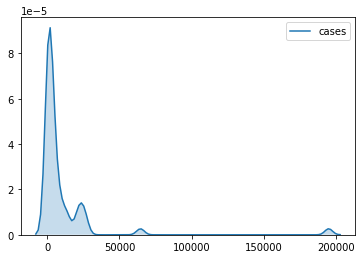

In [0]:
sns.kdeplot(df.loc[daybefore:today]["cases"], shade=True)

Create a data frame the identifies the top 10 states, sort by deaths and cases

In [0]:
current_df = df.loc[daybefore:today].sort_values(by=["deaths", "cases"], ascending=False)
current_df.head(10)

,state,fips,cases,deaths
date,,,,
2020-04-13,New York,36,195031,10056
2020-04-13,New Jersey,34,64584,2443
2020-04-13,Michigan,26,25487,1601
2020-04-13,Louisiana,22,21016,884
2020-04-13,Massachusetts,25,26867,844
2020-04-13,Illinois,17,22025,800
2020-04-13,California,6,24334,725
2020-04-13,Connecticut,9,13381,602
2020-04-13,Pennsylvania,42,24295,563


In [0]:
current_df.shape

(56, 4)

In [0]:
top_ten_states = list(current_df["state"].head(10).values)
top_ten_states

['New York',
 'New Jersey',
 'Michigan',
 'Louisiana',
 'Massachusetts',
 'Illinois',
 'California',
 'Connecticut',
 'Pennsylvania',
 'Washington']

In [0]:
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns="fips")

In [0]:
set(top_states_df.state.values)

{'California',
 'Connecticut',
 'Illinois',
 'Louisiana',
 'Massachusetts',
 'Michigan',
 'New Jersey',
 'New York',
 'Pennsylvania',
 'Washington'}

Use Seaborn to create a basic line plot for the top 10 states

<Figure size 1080x360 with 0 Axes>

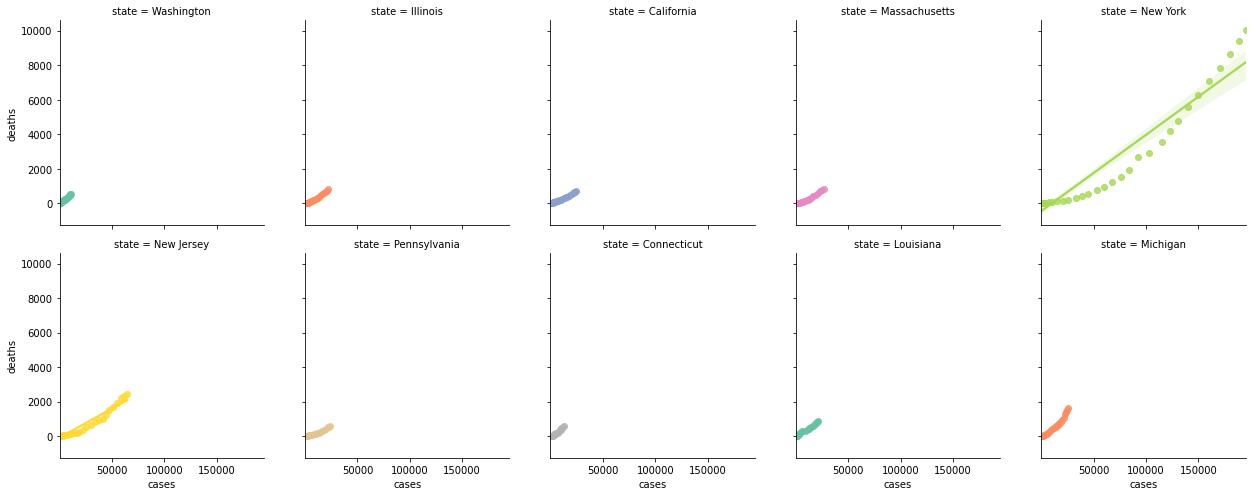

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="state",
                    col_wrap=5,
                    hue="state", 
                    palette="Set2",
                    data=top_states_df)
ax.fig.subplots_adjust(wspace=.2)

In [0]:
top_states_april_current_df = top_states_df.loc["2020-04-12":today].sort_values(by=["deaths", "cases"], ascending=False)
top_states_april_current_df.head(10)

,state,cases,deaths
date,,,
2020-04-13,New York,195031,10056
2020-04-12,New York,188694,9385
2020-04-13,New Jersey,64584,2443
2020-04-12,New Jersey,61850,2350
2020-04-13,Michigan,25487,1601
2020-04-12,Michigan,24494,1486
2020-04-13,Louisiana,21016,884
2020-04-13,Massachusetts,26867,844
2020-04-12,Louisiana,20595,840


Use another popular graphical tool called Plotly. This shows a scatter plot for the month of April for the top 10 states

In [0]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(top_states_april_current_df, x=top_states_april_current_df.index, y="cases", size="deaths", color="state", facet_col="state")
fig.show()

Original Code for ICS 360 HW - Import State Level Data for Hawaii from national dataset

In [0]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
Hawaii_df = df[df["state"] == "Hawaii"].drop(columns="fips").drop(columns="state")
Hawaii_df.tail(15)

,date,cases,deaths
1456,2020-03-29,175,0
1511,2020-03-30,204,0
1566,2020-03-31,224,1
1621,2020-04-01,258,1
1676,2020-04-02,283,2
1731,2020-04-03,317,3
1786,2020-04-04,349,3
1841,2020-04-05,369,4
1896,2020-04-06,385,5
1951,2020-04-07,408,5


Import County Level Data for Hawaii from county dataset

In [18]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
df = df[df["state"] == "Hawaii"].drop(columns="fips").drop(columns="state")
df.tail(15)

,date,county,cases,deaths
98781,2020-04-29,Honolulu,399,11
98782,2020-04-29,Kauai,21,0
98783,2020-04-29,Maui,115,5
101628,2020-04-30,Hawaii,73,0
101629,2020-04-30,Honolulu,399,11
101630,2020-04-30,Kauai,21,0
101631,2020-04-30,Maui,116,5
104482,2020-05-01,Hawaii,73,0
104483,2020-05-01,Honolulu,400,11
104484,2020-05-01,Kauai,21,0


In [0]:
df.shape

(150, 4)

Create a data frame for Maui County and display data for past 15 days

In [17]:
Maui_County_df = df[df["county"]== "Maui"]
Maui_County_df.tail(15)

,date,county,state,fips,cases,deaths
67973,2020-04-18,Maui,Hawaii,15009.0,104,3
70735,2020-04-19,Maui,Hawaii,15009.0,106,4
73505,2020-04-20,Maui,Hawaii,15009.0,108,4
76282,2020-04-21,Maui,Hawaii,15009.0,110,5
79065,2020-04-22,Maui,Hawaii,15009.0,110,5
81861,2020-04-23,Maui,Hawaii,15009.0,112,5
84662,2020-04-24,Maui,Hawaii,15009.0,113,5
87473,2020-04-25,Maui,Hawaii,15009.0,112,5
90291,2020-04-26,Maui,Hawaii,15009.0,112,5
93111,2020-04-27,Maui,Hawaii,15009.0,113,5


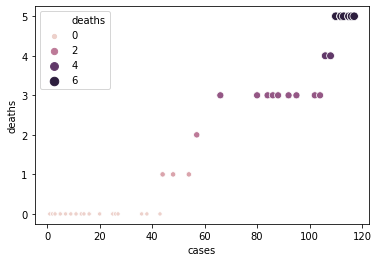

In [16]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=Maui_County_df)

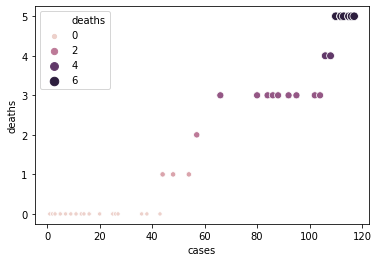

In [27]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=Maui_County_df)

Create a data frame for Honolulu County and display data for past 15 days

In [7]:
Honolulu_County_df = df[df["county"]== "Honolulu"]
Honolulu_County_df.tail(15)

,date,county,state,fips,cases,deaths
67971,2020-04-18,Honolulu,Hawaii,15003.0,382,6
70733,2020-04-19,Honolulu,Hawaii,15003.0,385,6
73503,2020-04-20,Honolulu,Hawaii,15003.0,385,6
76280,2020-04-21,Honolulu,Hawaii,15003.0,385,7
79063,2020-04-22,Honolulu,Hawaii,15003.0,388,7
81859,2020-04-23,Honolulu,Hawaii,15003.0,389,7
84660,2020-04-24,Honolulu,Hawaii,15003.0,392,8
87471,2020-04-25,Honolulu,Hawaii,15003.0,395,9
90289,2020-04-26,Honolulu,Hawaii,15003.0,396,9
93109,2020-04-27,Honolulu,Hawaii,15003.0,396,11


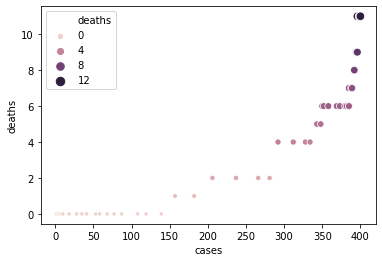

In [26]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=Honolulu_County_df)

<Figure size 1080x360 with 0 Axes>

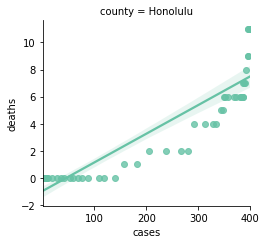

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="county",
                    col_wrap=5,
                    hue="county", 
                    palette="Set2",
                    data=Honolulu_County_df)
ax.fig.subplots_adjust(wspace=.2)

In [10]:
Kauai_County_df = df[df["county"]== "Kauai"]
Kauai_County_df.tail(15)

,date,county,state,fips,cases,deaths
67972,2020-04-18,Kauai,Hawaii,15007.0,21,0
70734,2020-04-19,Kauai,Hawaii,15007.0,21,0
73504,2020-04-20,Kauai,Hawaii,15007.0,21,0
76281,2020-04-21,Kauai,Hawaii,15007.0,21,0
79064,2020-04-22,Kauai,Hawaii,15007.0,21,0
81860,2020-04-23,Kauai,Hawaii,15007.0,21,0
84661,2020-04-24,Kauai,Hawaii,15007.0,21,0
87472,2020-04-25,Kauai,Hawaii,15007.0,21,0
90290,2020-04-26,Kauai,Hawaii,15007.0,21,0
93110,2020-04-27,Kauai,Hawaii,15007.0,21,0


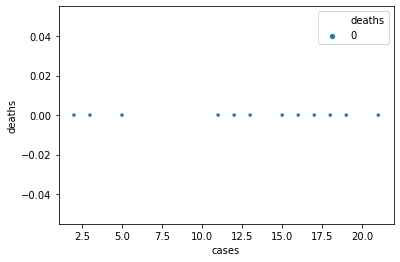

In [11]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=Kauai_County_df)